In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


class European_Call_Payoff:

    def __init__(self, strike):
        self.strike = strike

    def get_payoff(self, stock_price):
        if stock_price > self.strike:
            return stock_price - self.strike
        else:
            return 0


class GeometricBrownianMotion:

    def simulate_paths(self):
        while(self.T - self.dt > 0):
            dWt = np.random.normal(0, math.sqrt(self.dt))  # Brownian motion
            dYt = self.drift*self.dt + self.volatility*dWt  # Change in price
            self.current_price += dYt  # Add the change to the current price
            self.prices.append(self.current_price)  # Append new price to series
            self.T -= self.dt  # Accound for the step in time

    def __init__(self, initial_price, drift, volatility, dt, T):
        self.current_price = initial_price
        self.initial_price = initial_price
        self.drift = drift
        self.volatility = volatility
        self.dt = dt
        self.T = T
        self.prices = []
        self.simulate_paths()

# Model Parameters
n_volatility = 100

vol_price_list = []
for volatility_idx in range(n_volatility):
    paths = 10
    initial_price = 100
    drift = .08
    volatility = np.random.uniform(0.3,0.5)
    dt = 1/365
    T = 1
    price_paths = []

    # Generate a set of sample paths
    for i in range(0, paths):
        price_paths.append(GeometricBrownianMotion(initial_price, drift, volatility, dt, T).prices)

    call_payoffs = []
    ec = European_Call_Payoff(100)
    risk_free_rate = .01
    for price_path in price_paths:
        call_payoffs.append(ec.get_payoff(price_path[-1])/(1 + risk_free_rate))  # We get the last stock price in the series generated by GBM to determin the payoff and discount it by one year

    # Plot the set of generated sample paths
    # for price_path in price_paths:
    #     plt.plot(price_path)
    # plt.show()
    # print(np.average(call_payoffs)*100,volatility,price_path[360])  # Options are in blocks of 100
    
    for price_path in price_paths:
        price = price_path[-1]
        vol_price_list.append([price, volatility])

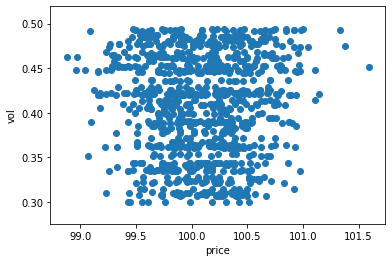

In [2]:
vol_price = np.array(vol_price_list)
price_list = vol_price[:, 0]
vol_list = vol_price[:, 1]
plt.scatter(price_list, vol_list) #畫點
plt.xlabel('price')
plt.ylabel('vol')
plt.show()